In [312]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
import plotly.graph_objects as go

In [393]:
file_path = 'FINALDATA/WT_planktonic_final/track5492_0_processed.txt'
data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['time', 'x', 'y', 'z', 'x_smooth', 'y_smooth', 'z_smooth'])
x_smooth = data['x_smooth']
y_smooth = data['y_smooth']
z_smooth = data['z_smooth']
time = data['time']
x = data['x']
y = data['y']
z = data['z']


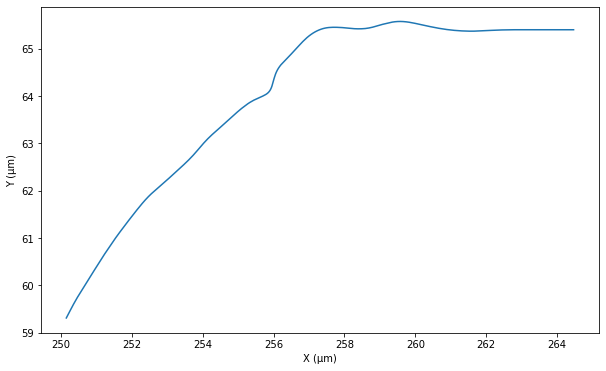

In [396]:
plt.figure(figsize=(10, 6))
plt.plot(x_smooth,y_smooth)
plt.xlabel('X (µm)')
plt.ylabel('Y (µm)')
plt.show()

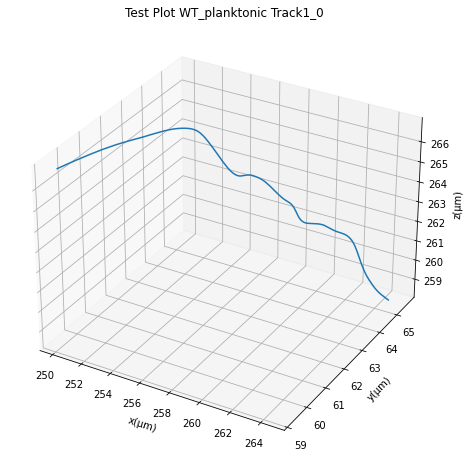

In [397]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.plot3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/MasterData/plots/track1_0_WT.png', dpi=300, bbox_inches='tight')

plt.show()

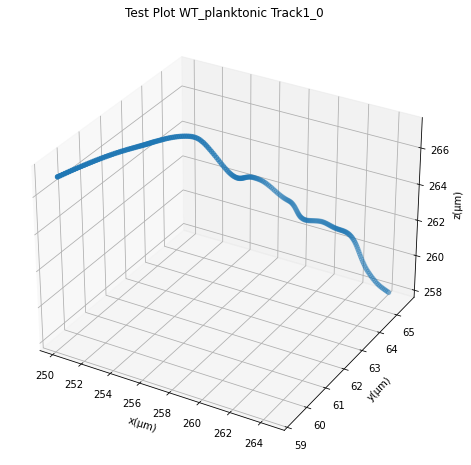

In [398]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.scatter3D(x_smooth, y_smooth, z_smooth)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')

plt.show()

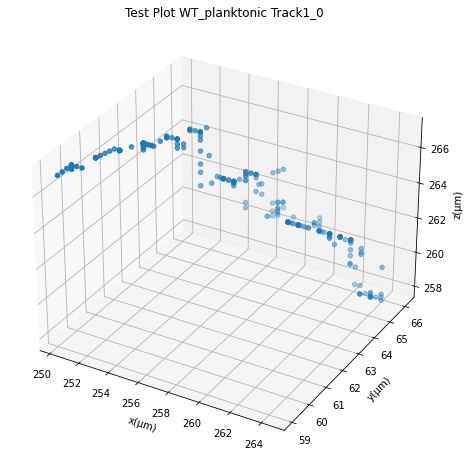

In [399]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.grid

ax.scatter3D(x, y, z)
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')

plt.show()

In [400]:
v_arr = np.zeros(len(data)-1)

In [401]:
v_arr = np.zeros(len(data))
t_arr = np.zeros(len(data)-1)

for i in range(1,len(data)-1):
    
    t_next = time.iloc[i+1]
    x_next = x_smooth.iloc[i+1]
    y_next = y_smooth.iloc[i+1]
    z_next = z_smooth.iloc[i+1]
    
    t_prev = time.iloc[i-1]
    x_prev = x_smooth.iloc[i-1]
    y_prev = y_smooth.iloc[i-1]
    z_prev = z_smooth.iloc[i-1]
    
    # Calculate radial distance for next and previous points
 
    
    
    r_diff = np.sqrt((x_next-x_prev)**2+(y_next-y_prev)**2+(z_next-z_prev)**2)
    dt = t_next - t_prev
  
  
    #velocity at the current point using central difference
    v = r_diff/ (dt)

    v_arr[i] = v
    t_arr[i]= dt
    
    
   

In [402]:
np.mean(v_arr)

17.17633772913912

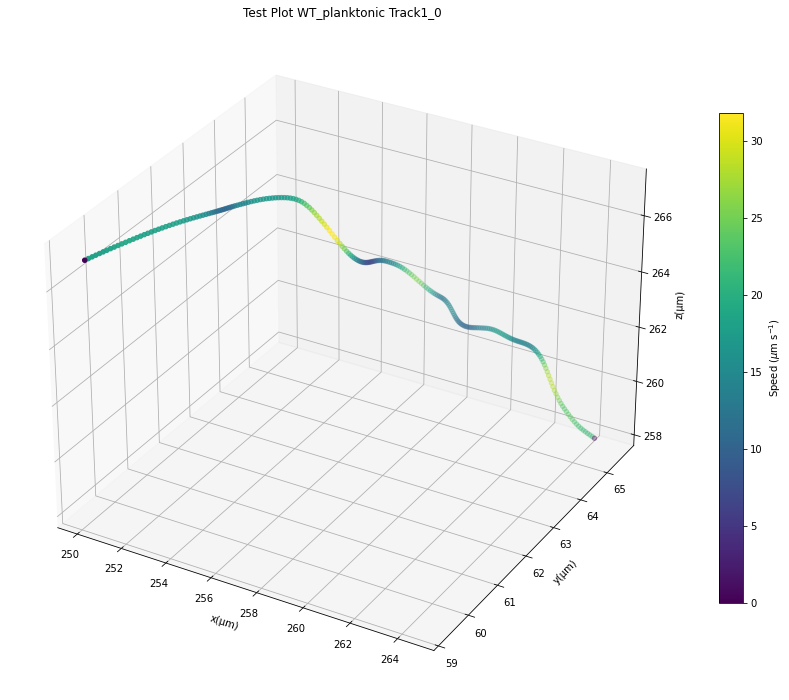

In [403]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')


scatter = ax.scatter(x_smooth, y_smooth, z_smooth, c=v_arr, cmap='viridis', marker='o')

# Add color bar to show velocity scale
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label(r'Speed ($\mu$m s$^{-1}$)')
ax.set_title('Test Plot WT_planktonic Track1_0')
ax.set_xlabel('x(µm)')
ax.set_ylabel('y(µm)')
ax.set_zlabel('z(µm)')
plt.savefig('/Users/ethanbrentnall/documents/0_Mphys_Project/plots/track1_0_WT_withv', dpi=300, bbox_inches='tight')
plt.show()

In [404]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter3d(x=x_smooth,y=y_smooth,z=z_smooth, mode='markers', marker=dict(
        size=5,  color=v_arr,  colorscale='Viridis',  colorbar=dict(title=dict(text='Speed (µm s<sup>-1</sup>)',  
                font=dict(size=12)),titleside='right'),showscale=True,)))

# Add titles and labels
fig.update_layout(
    title='Test Plot WT_planktonic Track1_0',
    scene=dict(xaxis_title='x (µm)', yaxis_title='y (µm)', zaxis_title='z (µm)', aspectmode='cube'),
    width=800, height=800,)

# Show the plot
fig.show()


In [405]:
x_error_arr = np.zeros(len(data))
for i in range (len(data)):
    x_error = np.abs(x[i]-x_smooth[i])
    x_error_arr[i] = x_error
    

In [406]:
z_error_arr = np.zeros(len(data))
for i in range (len(data)):
    z_error = np.abs(z[i]-z_smooth[i])
    z_error_arr[i] = z_error
    

In [368]:
y_error_arr = np.zeros(len(data))
for i in range (len(data)):
    y_error = np.abs(y[i]-y_smooth[i])
    y_error_arr[i] = y_error
    

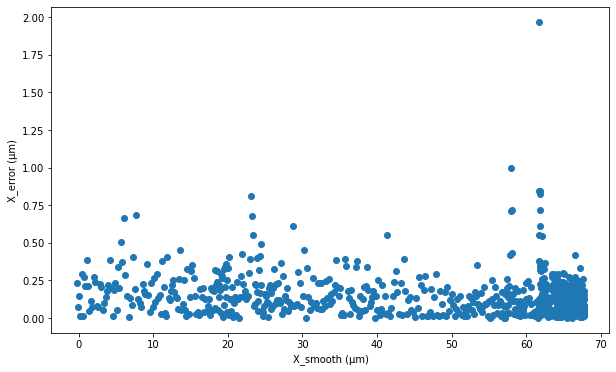

In [369]:
plt.figure(figsize=(10, 6))
plt.scatter(x_smooth, x_error_arr)
plt.xlabel('X_smooth (µm)')
plt.ylabel('X_error (µm)')
plt.show()

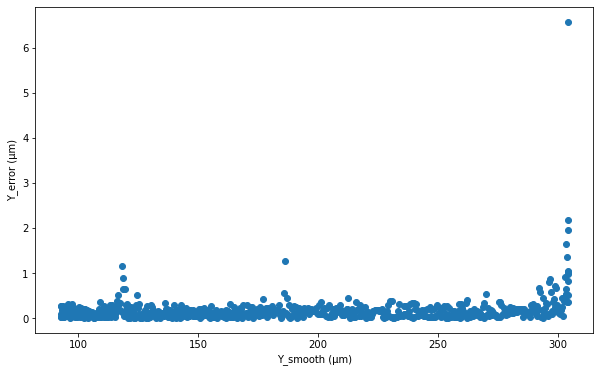

In [370]:
plt.figure(figsize=(10, 6))
plt.scatter(y_smooth, y_error_arr)
plt.xlabel('Y_smooth (µm)')
plt.ylabel('Y_error (µm)')
plt.show()

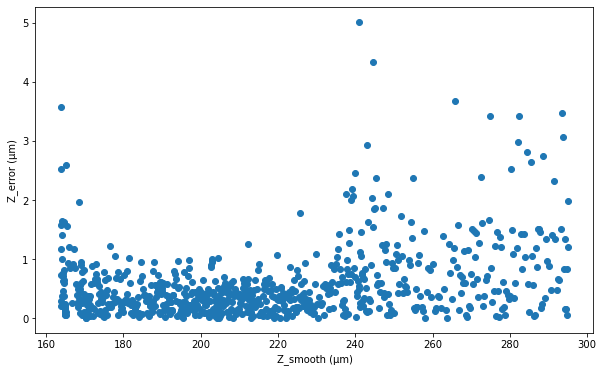

In [371]:
plt.figure(figsize=(10, 6))
plt.scatter(z_smooth, z_error_arr)
plt.xlabel('Z_smooth (µm)')
plt.ylabel('Z_error (µm)')
plt.show()

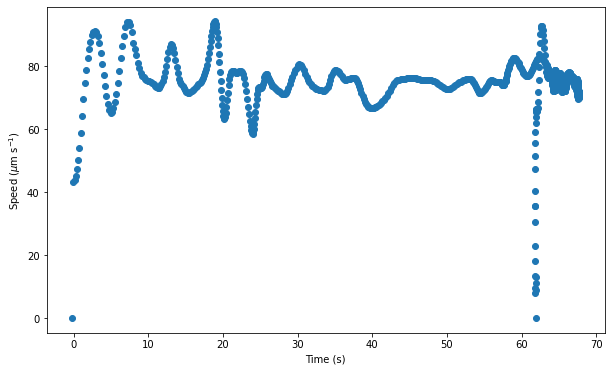

In [372]:
plt.figure(figsize=(10, 6))
plt.scatter(x_smooth, v_arr)
plt.xlabel('Time (s)')
plt.ylabel(r'Speed ($\mu$m s$^{-1}$)')
plt.show()

In [373]:
import os
def extract_track_name(file_path):
    # Extract the file name without the extension
    track_name = os.path.splitext(os.path.basename(file_path))[0]
    return track_name



In [374]:
track_name = extract_track_name(file_path)

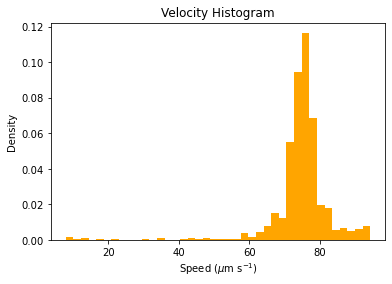

In [375]:

no_of_bins = 40

velocity = v_arr
# Take out 1st and last value as they are 0
velocity_filtered = v_arr[1:-1]

# Plot histogram for velocity
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange')
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.savefig(f'velo_plots/no_0_{track_name}.png', format='png')

# Show plot
plt.show()



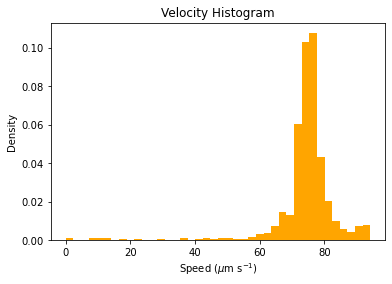

In [376]:
velocity = v_arr
#Showing hist with the 0 values

# Plot histogram for velocity
plt.hist(velocity, bins=no_of_bins, density=True, color='orange')
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.savefig(f'velo_plots/first_plot_{track_name}.png', format='png')
# Show plot
plt.show()

sigma = 0.2150851206192427 mean = 4.294030061014721


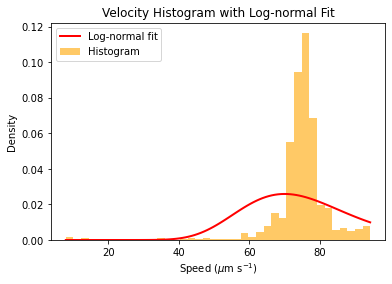

In [377]:

from scipy.stats import lognorm

velocity = v_arr

# Exclude the first and last point
velocity_filtered = v_arr[1:-1]

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(velocity_filtered, floc=0)

# Array of 100 values for velocity 
x = np.linspace(min(velocity_filtered), max(velocity_filtered), 100)

# Plot histogram for the filtered velocity
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange', alpha=0.6, label='Histogram')

# Create lognormal function from x 
pdf = lognorm.pdf(x, shape, loc, scale)

plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')

# Labels and title
plt.title('Velocity Histogram with Log-normal Fit')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.legend()


mu = np.log(scale)  # Mean of the function
s = shape  # Standard deviation of the function
c = 0
a = 1
#print mean and stddev
print('sigma =', s,'mean =', mu)
#plt.savefig(f'velo_plots/scipy_plot_{track_name}.png', format='png')
# Show plot
plt.show()



In [378]:
import numpy as np


# Create a histogram whihc I can extract values from
hist, bin_edges = np.histogram(v_arr, bins=no_of_bins, density=True)  # Adjust the number of bins as needed

# Calculate the bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
density = hist
print("Bin Centers:", len(bin_centers))
print(len(density))

Bin Centers: 40
40


In [379]:
def fit_function(x,mu,sigma,c):  #x prefactor mean stddev const
    global args 
    args = fit_function.__code__.co_varnames
    return (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-((np.log(x) - mu)**2) / (2 * sigma**2))+c  #lognormal func

In [380]:
guess = (mu , s, c ) #Initial guess values 

In [381]:
fit_function(1,*guess)

if len(args)-1 != len(guess):
    print('error, wrong number of guesses')
else:
    print('FITTING CAN GO AHEAD')
    print(len(args)-1, 'parameters fitting with following initial guesses')
    for i in range(len(guess)):
        print(args[i+1],"=", guess[i])

FITTING CAN GO AHEAD
3 parameters fitting with following initial guesses
mu = 4.294030061014721
sigma = 0.2150851206192427
c = 0


[4.32113327e+00 4.57657117e-02 6.92348148e-08]


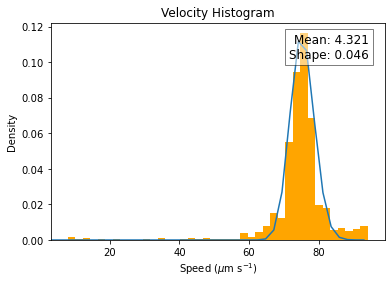

In [382]:
from scipy.optimize import curve_fit

para,covar=curve_fit(fit_function, bin_centers, density,  p0=guess)
print(para)
x_lognorm = bin_centers
y_lognorm = fit_function(x_lognorm, para[0],para[1],para[2])
plt.hist(velocity_filtered, bins=no_of_bins, density=True, color='orange')
plt.plot(x_lognorm,y_lognorm)
plt.xlim(min(velocity_filtered)-5, max(velocity_filtered)+5)
plt.title('Velocity Histogram')
plt.xlabel(r'Speed ($\mu$m s$^{-1}$)')
plt.ylabel('Density')
plt.text(0.95, 0.95, f'Mean: {np.round(para[0],3)}\nShape: {np.round(para[1],3)}', 
         horizontalalignment='right', verticalalignment='top', 
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.savefig(f'velo_plots/my_fit_{track_name}.png', format='png')
plt.show()

# Positional change consectutive points 

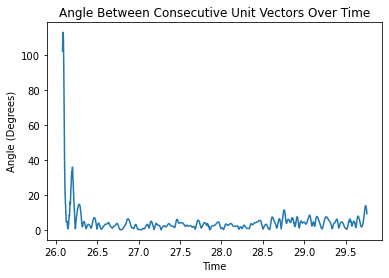

0.9807089069441945
0.9153159415025618
0.8118108956728007
0.8873713364878354
0.9645614296535223
0.9873295931486559
0.9878100262467918
0.9856553396202371


In [391]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points

    # Calculate difference in positional vectors between consecutive points
dir_vectors = np.diff(positions, axis=0)

    # Calculate magnitudes of direction vectors
mags = np.linalg.norm(dir_vectors, axis=1)

    # Calculate unit direction vectors
unit_dir = dir_vectors / mags[:, np.newaxis]

    # Calculate dot products between consecutive unit vectors
dot_products = np.array([np.dot(unit_dir[i], unit_dir[i+1]) for i in range(len(unit_dir) - 1)])

    # Calculate angles using arccos of the dot products
angles = np.arccos(np.clip(dot_products, -1.0, 1.0))  # Clip to avoid invalid values due to precision errors

    # Calculate corresponding time values (average of two consecutive time points)
time_values = np.array([(time[i] + time[i+1]) / 2 for i in range(1, len(time) - 1)])

    

# Example usage
time_values, angles = calculate_angles_and_times(data)

# Plotting the angles over time
plt.plot(time_values, np.degrees(angles))  # Convert radians to degrees for easier interpretation
plt.xlabel('Time')
plt.ylabel('Angle (Degrees)')
plt.title('Angle Between Consecutive Unit Vectors Over Time')
plt.show()


for dp in dot_products:
    if dp < 0.99:
        print(dp)

# Comparison over a larger scale 

In [384]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

k = 5

dir_vectors_LS = positions[k:] - positions[:-k]

mags_LS = np.linalg.norm(dir_vectors_LS, axis = 1)
unit_dir_LS = dir_vectors_LS / mags_LS[:, np.newaxis]


dot_products_LS = [np.dot(unit_dir_LS[i], unit_dir_LS[i+1]) for i in range(len(unit_dir_LS)-1)] #essentially all parallel

#for dp in dot_products_LS:
    #if dp < 0.99:
        #print(dp)


# Comparing ahead, issue it skips vectors and could skip events. Does a better job of identifying a difference of direction. 

In [385]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)

mags = np.linalg.norm(dir_vectors, axis = 1)
unit_dir = dir_vectors / mags[:, np.newaxis]
k = 5 #still taking vectors as line beween consecutive points, but no compare 5 ahead in unit vector list
dot_products = [np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir)-k)] #essentially all parallel

#for dp in dot_products:
    #if dp < 0.99:
        #print(dp)

# Rolling average method

In [386]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors_RA = np.diff(positions, axis = 0)

avrg_size = 5

RA_vectors = np.array([np.mean(dir_vectors_RA[i:i+avrg_size], axis = 0)
                      for i in range(len(dir_vectors_RA)- avrg_size + 1)])

mags = np.linalg.norm(RA_vectors, axis = 1)
unit_dir_RA = RA_vectors / mags[:, np.newaxis]

dot_products_RA = [np.dot(unit_dir_RA[i], unit_dir_RA[i+1]) for i in range(len(unit_dir_RA)-1)] #essentially all parallel



# Most effective way so far is this 


In [387]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)

mags = np.linalg.norm(dir_vectors, axis = 1)
unit_dir = dir_vectors / mags[:, np.newaxis]
k = 5 #still taking vectors as line beween consecutive points, but no compare 5 ahead in unit vector list
dot_products = [np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir)-k)] 






## This obtains actual differences in the direction which is good, I am guessing thatwhen there is a re orientation event, this event will occur where the dot products are consecutivly closer to 1. 

In [388]:
x_smooth = np.array(data['x_smooth'])
y_smooth = np.array(data['y_smooth'])
z_smooth = np.array(data['z_smooth'])
time = data['time']
x = np.array(data['x'])
y = np.array(data['y'])
z = np.array(data['z'])

positions = np.stack((x_smooth,y_smooth,z_smooth), axis = 1)

#difference in positional vectors, between consectutive points
dir_vectors = np.diff(positions, axis = 0)
#calculate magnitue of vectors
mags = np.linalg.norm(dir_vectors, axis = 1)
#create unit vectors
unit_dir = dir_vectors / mags[:, np.newaxis]

k = 5 #still taking vectors as line beween consecutive points, but now compare 5 ahead in unit vector list
dot_products = [np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir)-k)] 

change_in_dir_threshold = 0.99
consecutive_low_values  = 3

low_sequences = []
current_sequence = []

for i in range(len(dot_products)):
    if dot_products[i] < change_in_dir_threshold:
        current_sequence.append(dot_products[i])
        
    else:
        if len(current_sequence) >= consecutive_low_values:
            low_sequences.append(current_sequence)
        current_sequence = []  # Reset for the next sequence

if len(current_sequence) >= consecutive_low_values:
    low_sequences.append(current_sequence)
print("Reorientation events", len(low_sequences), 'Events')
print("Reorientation events per second", len(low_sequences)/(np.max(time)-np.min(time)), 'Events/s')


Reorientation events 5 Events
Reorientation events per second 1.3495276653171395 Events/s


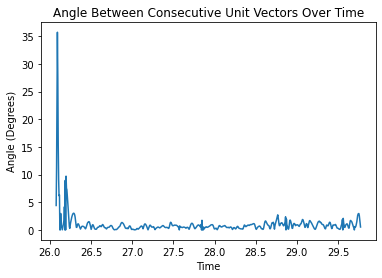

In [389]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_angles_and_times(data):
    # Extract smoothened positions and time from the data
    x_smooth = np.array(data['x_smooth'])
    y_smooth = np.array(data['y_smooth'])
    z_smooth = np.array(data['z_smooth'])
    time = np.array(data['time'])

    # Stack x, y, z smoothened positions together
    positions = np.stack((x_smooth, y_smooth, z_smooth), axis=1)

    # Calculate difference in positional vectors between consecutive points
    dir_vectors = np.diff(positions, axis=0)

    # Calculate magnitudes of direction vectors
    mags = np.linalg.norm(dir_vectors, axis=1)

    # Calculate unit direction vectors
    unit_dir = dir_vectors / mags[:, np.newaxis]

    # Calculate dot products between consecutive unit vectors
    dot_products = np.array([np.dot(unit_dir[i], unit_dir[i+1]) for i in range(len(unit_dir) - 1)])

    # Calculate angles using arccos of the dot products
    angles = np.arccos(np.clip(dot_products, -1.0, 1.0))  # Clip to avoid invalid values due to precision errors

    # Calculate corresponding time values (average of two consecutive time points)
    time_values = np.array([(time[i] + time[i+1]) / 2 for i in range(1, len(time) - 1)])

    return time_values, angles

# Example usage
time_values, angles = calculate_angles_and_times(data)

# Plotting the angles over time
plt.plot(time_values, np.degrees(angles))  # Convert radians to degrees for easier interpretation
plt.xlabel('Time')
plt.ylabel('Angle (Degrees)')
plt.title('Angle Between Consecutive Unit Vectors Over Time')
plt.show()

        


0.9807089069441945
0.9153159415025618
0.8118108956728007
0.8873713364878354
0.9645614296535223
0.9873295931486559
0.9878100262467918
0.9856553396202371


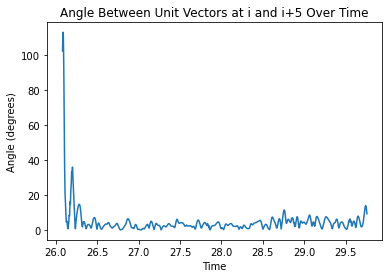

In [392]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_angles_and_times(data, k=5):

    # Extract smoothened positions and time from the data
    x_smooth = np.array(data['x_smooth'])
    y_smooth = np.array(data['y_smooth'])
    z_smooth = np.array(data['z_smooth'])
    time = np.array(data['time'])

    # Stack x, y, z smoothened positions together
    positions = np.stack((x_smooth, y_smooth, z_smooth), axis=1)

    # Calculate difference in positional vectors between consecutive points
    dir_vectors = np.diff(positions, axis=0)

    # Calculate magnitudes of direction vectors
    mags = np.linalg.norm(dir_vectors, axis=1)

    # Calculate unit direction vectors
    unit_dir = dir_vectors / mags[:, np.newaxis]

    # Calculate dot products between ith and (i+k)th unit vectors
    dot_products = np.array([np.dot(unit_dir[i], unit_dir[i+k]) for i in range(len(unit_dir) - k)])

    # Calculate angles using arccos of the dot products
    angles = np.arccos(np.clip(dot_products, -1.0, 1.0))  # Clip to avoid precision errors

    # Calculate corresponding time values (average of time at i and i+k)
    time_values = np.array([(time[i] + time[i+k]) / 2 for i in range(len(time) - k - 1)])

    return time_values, angles

time_values, angles = calculate_angles_and_times(data, k=5)


        
# Plotting the angles over time
plt.plot(time_values, np.degrees(angles))  
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.title('Angle Between Unit Vectors at i and i+5 Over Time')
plt.show()
